<a href="https://colab.research.google.com/github/lorena-zuzic/MD_Protein_Science/blob/main/MD_Protein_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Visualise

- download the files (with water)

- visualise a trajectory in pymol

- align Insulin to IR - R-form doesn't fit, T-form fits


2. Analyse

- Markdown explanations

- Explain notebooks

- - Google Colab (.ipynb, Markdown vs. Code...)

- Background for the insulin (two conformations - explain during the lecture)

- Explain packages

- Explain https://mdtraj.org/1.9.4/

- explain matplotlib

3. Tasks

- Load trajectory

- RMSD

- Choosing the reference - one or other conformation

- Atom selection

- RMSF

- How to analyse data when you have too much data

- DSSP

- Their job - find a relevant measure monitoring the conf change and plot



# Insulin: the background

# Conformational forms

Download the Github repository using the code below.

## Looking at the static structures

T: Load the two pdb structures into pymol.

T: align the two structures and compare.


Q: How many chains does insulin contain?

Q: How many disulfide bonds can you see?

Q: What insulin structure is in what conformation?


## Load an IR structure and find a fit - hmm not sure I want them to do this

T: Load an IR structure

Q: What insulin structure fits better within the receptor?

T: Load a trajectory and look at it

T: explore the buttons

Q: How many frames are there in a trajectory? The simulation was run for 100 ns (ish)

T: Find a command that will show you all frames of the simulation at the same time

(hint: it starts with set)

T: Align all frames - give them a command

# Analysis

In [1]:
# MDTraj library (explained below) needs to be installed in a Google Colab environment. The installation is handled by the pip command.
%pip install MDTraj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 66.5 MB/s eta 0:00:00


### Loading packages

The core Python functionalities are versatile, but limited in terms of specialised functions or data structures that we need if we want to (quickly) analyse our data.

We can therefore use special **libraries** that contain **packages** of Python code. Each package contains **modules**, which are files with custom-made functions or variables. The libraries are loaded with:

 ```import [library_name] as [nickname]```

The individual packages within the library as loaded with:

```import [library_name].[package_name] as [nickname]```

The modules within an individual package within a library are loaded with:

```from [library_name].[package_name] import [module_name(s)]```

### Specific imports

1. ```mdtraj```: a package for loading and analysing MD simulations data. Documentation available [here](https://mdtraj.org/1.9.4/index.html).

2. ```numpy```: a very frequently used package that deals with datasets (in a form of multidimensional arrays).

3. ```seaborn```: data visualisation, makes nice heatmaps

4. ```matplotlib```: general data visualisation


In [2]:
# Import libraries
import mdtraj as md
import numpy as np
import seaborn as sns

# Import packages
import matplotlib.pyplot as plt

# Import modules
from matplotlib.colors import ListedColormap, BoundaryNorm

### Downloading the data

Google Colab notebooks are hosted on a cloud. To analyse our data, we need to upload them to this cloud environment. We will use the ```git clone``` command that clones the Github repository ([github.com/au-mbg/protein_science/](https://github.com/au-mbg/protein_science/)) into this cloud environment.

The command is **not** a Python command, but instead a Linux terminal command. The ```!``` specifies that this command needs to be executed as such.  

In [3]:
!git clone https://github.com/au-mbg/protein_science.git


Cloning into 'protein_science'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 24 (delta 0), reused 2 (delta 0), pack-reused 17 (from 1)
Receiving objects: 100% (24/24), 30.50 MiB | 34.10 MiB/s, done.
Resolving deltas: 100% (4/4), done.


To check if the data uploaded correctly, you can use the terminal command ```ls```. Again, this is a terminal command (hence ```!```).


In [4]:
!ls

protein_science  sample_data


# Data load

The data consists of:
- ```topology file```: usually a coordinate file (e.g., pdb). Specifies atom types, residue names, residue numbering, ...
- ```trajectory file```: usually with the extension .xtc. Specifies the position of each atom in each frame of the simulation (ergo, describes a trajectory). It is a binary file (not human readable!)

Mdtraj has several load functions that can be used to load the data into the Python environment.

```md.load_pdb```
  - a function that loads the .pdb file
  - ```md``` is the nickname for the mdtraj library. We need to specify that the function ```load_pdb``` is to be sourced out of this library.
  - required parameter: ```filename```, pointing to the PDB file

```md.load```
- a function that loads the MD trajectory (.xtc file format) and requires a topology file.
- required parameters: a trajectory file + a topology file



In [5]:
# Load trajectory 1
top_path_1="/content/protein_science/Insulin/INS1.pdb"
traj_path_1="/content/protein_science/Insulin/INS1.xtc"

pdb_1 = md.load_pdb(top_path_1)
t_1 = md.load(traj_path_1, top = top_path_1)
print(t_1)

<mdtraj.Trajectory with 99 frames, 786 atoms, 51 residues, and unitcells>


In [6]:
# Load trajectory 2
# TODO: eliminate some of the bits

top_path_2="/content/protein_science/Insulin/INS2.pdb"
traj_path_2="/content/protein_science/Insulin/INS2.xtc"

pdb_2 = md.load_pdb(top_path_2)
t_2 = md.load(traj_path_2, top = top_path_2)
print(t_2)


<mdtraj.Trajectory with 99 frames, 786 atoms, 51 residues, and unitcells>


# An (over)abundance of data

- how to deal with massive amounts of data?

- how to extract anything of interest out of it?

A common approach is the "funnel" method (copyright pending), where one starts with **global** analyses, where the dynamic information of your molecule of interest (i.e., protein) is described within a single measure.

- e.g., RMSD, radius of gyration, solvent accessible surface area, ...

- advantage: overskueligt

- disadvantage: often a degenerate variable - meaning that multiple states correspond to the same value

After getting a 'hunch' about the behaviour of your molecule of interest, one can continue with more precise, **local** analyses:

- e.g., RMSF, secondary structure, measures of specific residue distances/angles/dihedrals..

- advantage: offer per-residue or per-atom level of detail

- disadvantage: longer computational times; often multidimensional datasets (>2) that are difficult to plot; in practice, the researchers are often required to specify a narrow subset of features of interest

  - in order to specify this, you already need to know something about your system!

# RMSD calculations

- what is it

- what is the reference

- how does the choice of reference help us with our analysis

- WHAT IS YOUR RESEARCH QUESTION?

1) How much does the protein 'move' over a simulation trajectory?

- Quantifying the difference between the first frame of the simulation (a reference) over a trajectory

- what to choose as a reference?

- this analysis uses only the information within a single simulation

2) Quantifying the difference between the different simulations

In [22]:
rmsd_1 = md.rmsd(t_1, reference = pdb_1)

rmsd_2 = md.rmsd(t_2, reference = pdb_2)


In [23]:
t_1.time # In ps
time_ns = t_1.time / 1000

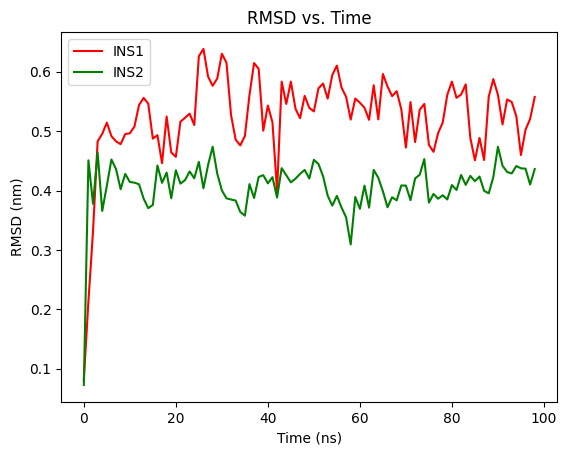

In [24]:
fig, ax = plt.subplots()
ax.plot(time_ns, rmsd_1, color = "red")
ax.plot(time_ns, rmsd_2, color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (nm)")
ax.set_title("RMSD vs. Time")
ax.legend(["INS1", "INS2"])
plt.show()

In [10]:
ca_atoms_1 = pdb_1.topology.select("name CA")
ca_atoms_2 = pdb_2.topology.select("name CA")

print(ca_atoms_1)
print(ca_atoms_2)

resid_index = list(range(0,pdb_1.topology.n_residues))
print(resid_index)

[  4  24  40  54  71  88 107 117 124 135 152 171 187 202 212 231 252 271
 287 297 304 319 343 350 370 390 411 427 439 461 478 485 504 520 535 552
 562 572 586 597 616 626 637 656 677 694 713 728 742 763 773]
[  4  24  40  54  71  88 107 117 124 135 152 171 187 202 212 231 252 271
 287 297 304 319 343 350 370 390 411 427 439 461 478 485 504 520 535 552
 562 572 586 597 616 626 637 656 677 694 713 728 742 763 773]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [11]:
rmsf_1 = md.rmsf(t_1, reference = pdb_1, atom_indices = ca_atoms_1)
rmsf_2 = md.rmsf(t_2, reference = pdb_2, atom_indices = ca_atoms_2)


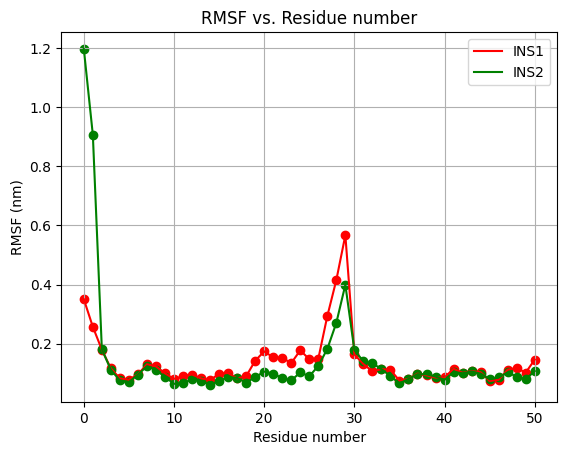

In [12]:
fig, ax = plt.subplots()
ax.plot(resid_index, rmsf_1, color = "red")
ax.scatter(resid_index, rmsf_1, color = "red", label = '_nolegend_')
ax.plot(resid_index, rmsf_2, color = "green")
ax.scatter(resid_index, rmsf_2, color = "green", label = '_nolegend_')
ax.set_xlabel("Residue number")
ax.set_ylabel("RMSF (nm)")
ax.set_title("RMSF vs. Residue number")
ax.legend(["INS1", "INS2"])
ax.grid()


In [13]:
dssp_1 = md.compute_dssp(t_1, simplified = True)
dssp_2 = md.compute_dssp(t_2, simplified = True)


Text(0.5, 1.0, 'DSSP Secondary Structure Heatmap')

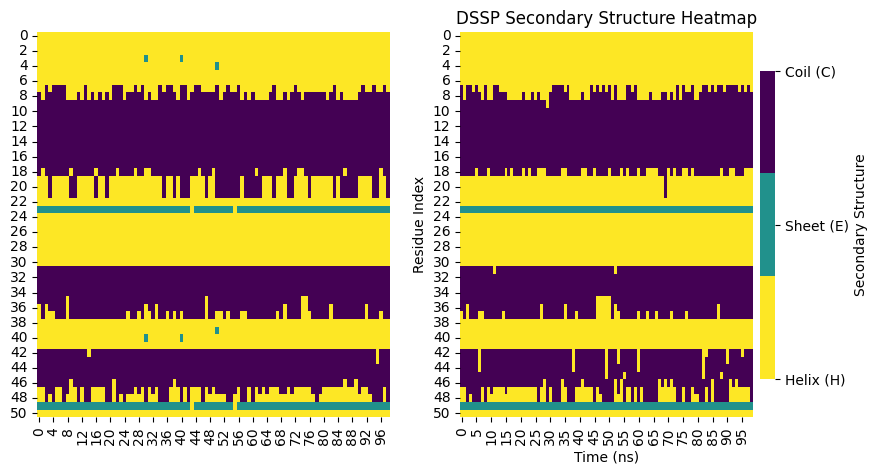

In [14]:
mapping = {'C':0,
           'H':2,
           'E':1}
numeric_dssp_1 = np.vectorize(mapping.get)(dssp_1)
numeric_dssp_2 = np.vectorize(mapping.get)(dssp_2)

# Define discrete colormap
colors = ['#fde725', '#21918c', '#440154']  # H, E, C
cmap = ListedColormap(colors)
fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0] = sns.heatmap(numeric_dssp_1.T, cmap = cmap, ax=axes[0], cbar=False,
                      cbar_kws={
        'ticks': [0, 1, 2],  # positions of labels
        'label': 'Secondary Structure',
        'shrink': 0.8,
        'pad': 0.02
    })

axes[1] = sns.heatmap(numeric_dssp_2.T, cmap = cmap, ax=axes[1], cbar_kws={
        'ticks': [0, 1, 2],  # positions of labels
        'label': 'Secondary Structure',
        'shrink': 0.8,
        'pad': 0.02
    })

# Custom tick labels
cbar = plt.gca().collections[0].colorbar
cbar.set_ticklabels(['Helix (H)', 'Sheet (E)', 'Coil (C)'])

plt.xlabel('Time (ns)')
plt.ylabel('Residue Index')
plt.title('DSSP Secondary Structure Heatmap')




In [15]:
def SumSS(dssp_df, ss_name):
  ss_element_sum_list = []
  for frame in dssp_df:
    ss_element_sum = 0
    for res in frame:
      if res == ss_name:
        ss_element_sum += 1
    ss_element_sum_list.append(ss_element_sum)
  return(ss_element_sum_list)


In [16]:
SumSS(dssp_1, "H")

[21,
 21,
 24,
 26,
 25,
 24,
 24,
 26,
 20,
 23,
 25,
 25,
 22,
 26,
 23,
 23,
 24,
 23,
 22,
 28,
 24,
 23,
 25,
 25,
 24,
 23,
 24,
 23,
 23,
 24,
 21,
 21,
 23,
 20,
 26,
 28,
 25,
 24,
 24,
 22,
 28,
 27,
 27,
 23,
 24,
 23,
 25,
 23,
 24,
 22,
 27,
 25,
 27,
 28,
 28,
 27,
 27,
 23,
 27,
 25,
 28,
 24,
 26,
 22,
 23,
 23,
 27,
 21,
 23,
 21,
 25,
 27,
 24,
 22,
 18,
 20,
 25,
 24,
 25,
 24,
 23,
 22,
 21,
 27,
 22,
 26,
 23,
 25,
 25,
 24,
 24,
 24,
 21,
 24,
 29,
 26,
 23,
 24,
 28]

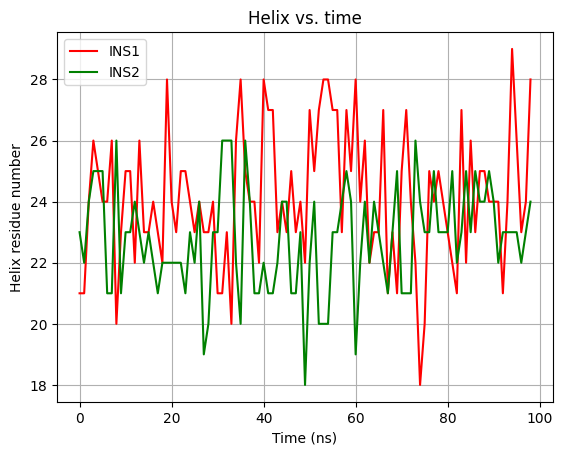

In [ ]:

fig,ax = plt.subplots()
ax.plot(time_ns, SumSS(dssp_1, "H"), color = "red")
ax.plot(time_ns, SumSS(dssp_2, "H"), color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Helix residue number")
ax.set_title("Helix vs. time")
ax.legend(["INS1", "INS2"])
ax.grid()


In [ ]:
distance_pairs_1 = [pdb_1.topology.select("(resid 11 or resid 26) and name CA")]
distance_pairs_2 = [pdb_2.topology.select("(resid 11 or resid 26) and name CA")]
print(distance_pairs_1)
print(distance_pairs_2)
dist_1 = md.compute_distances(t_1, distance_pairs_1)
dist_2 = md.compute_distances(t_2, distance_pairs_1)


[array([171, 411])]
[array([171, 411])]


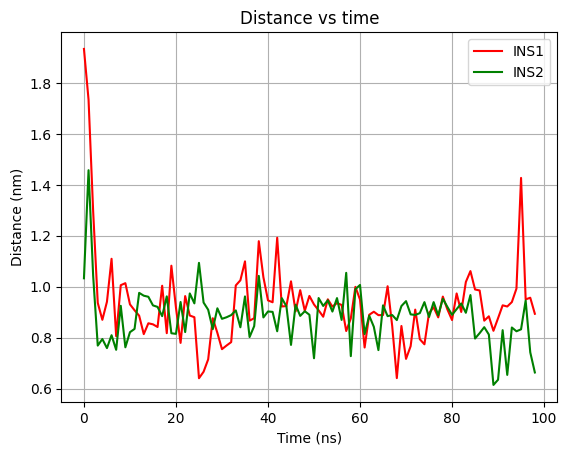

In [ ]:
fig, ax = plt.subplots()
ax.plot(time_ns, dist_1, color = "red")
ax.plot(time_ns, dist_2, color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (nm)")
ax.set_title("Distance vs time")
ax.legend(["INS1", "INS2"])
ax.grid()
